In [1]:
import pandas as pd

In [94]:
housing=pd.read_csv("/home/adesh/Downloads/datasets/california-housing-prices/housing.csv")

In [3]:
housing_2=pd.read_csv("/home/adesh/Downloads/datasets/california-housing-prices/housing.csv")

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
import numpy as np
np.unique(housing["ocean_proximity"])

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [7]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66835d1a50>,
      dtype=object)

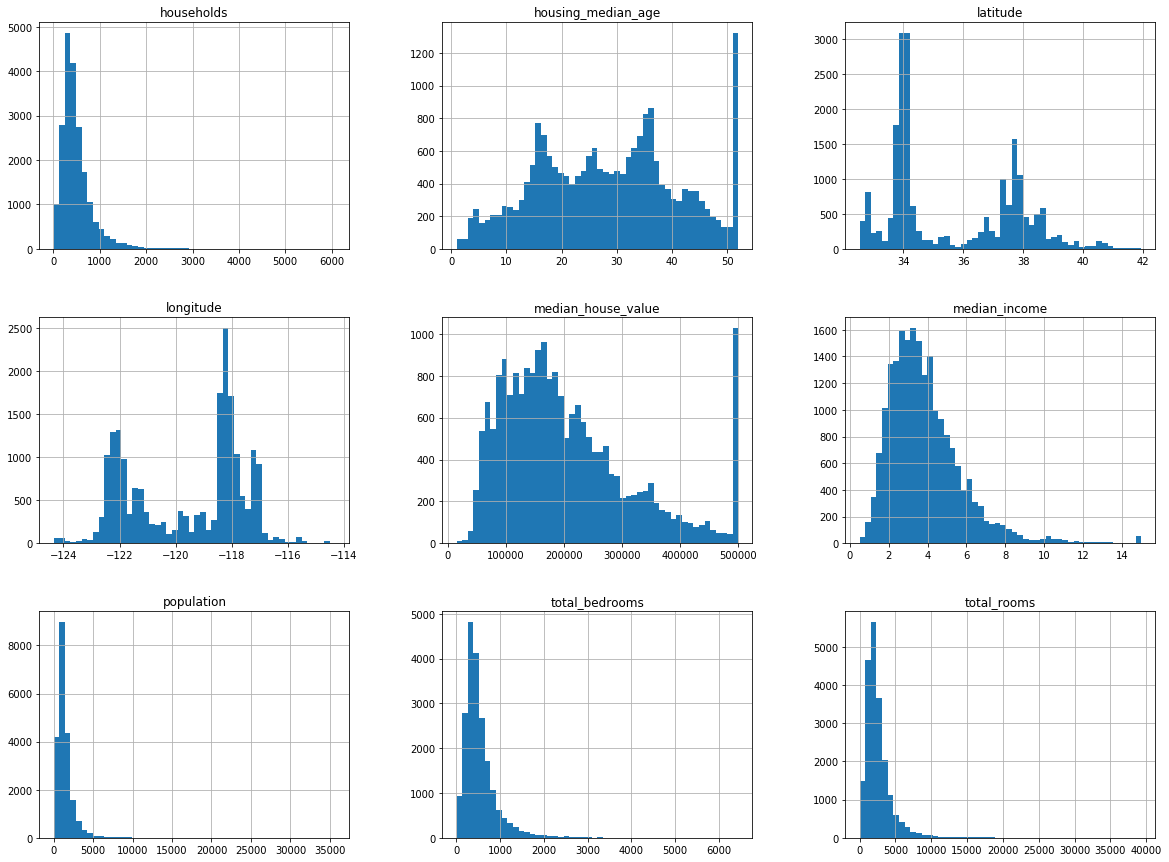

In [8]:
housing.hist(bins=50,figsize=(20,15))

In [95]:
np.unique(housing["median_income"])#already scaled 0-15

array([ 0.4999,  0.536 ,  0.5495, ..., 14.9009, 15.    , 15.0001])

In [96]:
housing["income_cat"]=np.ceil(housing["median_income"])

In [97]:
housing["income_cat"].unique()

array([ 9.,  8.,  6.,  4.,  5.,  3.,  2.,  1.,  7., 12., 11., 10., 14.,
       13., 16., 15.])

In [98]:
housing["ii"]=pd.qcut(housing["income_cat"],q=8,duplicates="drop",labels=[0,1,2,3,4])#binning by 
#dividing in quartiles

In [99]:
housing["ii"]

0        4
1        4
2        4
3        3
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: ii, Length: 20640, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [100]:
housing.drop("income_cat",inplace=True,axis=1)

In [101]:
housing.rename(columns={"ii":"income_cat"},inplace=True)

In [102]:
from sklearn.model_selection import StratifiedShuffleSplit

In [103]:
sss=StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)
for train_index,test_index in sss.split(housing,housing["income_cat"]):
    train_set=housing.loc[train_index]
    test_set=housing.loc[test_index]

In [104]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
19599,-120.93,37.56,17.0,1812.0,361.0,672.0,334.0,1.5500,166100.0,INLAND,0
18019,-121.95,37.24,37.0,3109.0,541.0,1566.0,544.0,6.0235,413500.0,<1H OCEAN,4
10018,-121.20,39.23,9.0,2802.0,447.0,955.0,418.0,5.2359,213300.0,INLAND,3
19483,-120.98,37.66,40.0,3012.0,616.0,1423.0,595.0,2.6346,100600.0,INLAND,0
17652,-121.88,37.26,13.0,1676.0,471.0,710.0,406.0,3.8936,225900.0,<1H OCEAN,1
...,...,...,...,...,...,...,...,...,...,...,...
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN,0
11409,-117.94,33.71,18.0,3695.0,602.0,1779.0,572.0,5.9449,276500.0,<1H OCEAN,3
15234,-117.26,32.97,25.0,2582.0,495.0,1088.0,471.0,6.4651,500001.0,NEAR OCEAN,4
17105,-122.22,37.46,13.0,2888.0,546.0,1182.0,504.0,6.0255,409300.0,NEAR OCEAN,4


In [105]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0


In [76]:
housing_2["income_cat"]=np.ceil(housing["median_income"])

In [77]:
housing_2["ii"]=pd.cut(housing_2["income_cat"],[0,3,6,9,12,15],labels=[0,1,2,3,4])#bining by my choice of range

In [82]:
housing_2.drop("income_cat",inplace=True,axis=1)

In [86]:
housing_2.rename(columns={"ii":"income_cat"},inplace=True)

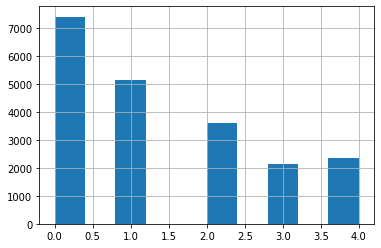

In [20]:
housing["income_cat"].hist()

In [106]:
for i in [train_set,test_set]:
    i.drop("income_cat",inplace=True,axis=1)

In [107]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19599,-120.93,37.56,17.0,1812.0,361.0,672.0,334.0,1.5500,166100.0,INLAND
18019,-121.95,37.24,37.0,3109.0,541.0,1566.0,544.0,6.0235,413500.0,<1H OCEAN
10018,-121.20,39.23,9.0,2802.0,447.0,955.0,418.0,5.2359,213300.0,INLAND
19483,-120.98,37.66,40.0,3012.0,616.0,1423.0,595.0,2.6346,100600.0,INLAND
17652,-121.88,37.26,13.0,1676.0,471.0,710.0,406.0,3.8936,225900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN
11409,-117.94,33.71,18.0,3695.0,602.0,1779.0,572.0,5.9449,276500.0,<1H OCEAN
15234,-117.26,32.97,25.0,2582.0,495.0,1088.0,471.0,6.4651,500001.0,NEAR OCEAN
17105,-122.22,37.46,13.0,2888.0,546.0,1182.0,504.0,6.0255,409300.0,NEAR OCEAN


In [108]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6004,-117.77,34.07,36.0,2922.0,652.0,2392.0,629.0,2.8661,124000.0,INLAND
1035,-120.88,38.45,25.0,1374.0,297.0,657.0,288.0,2.5476,97900.0,INLAND
1630,-122.17,37.88,32.0,3633.0,508.0,1393.0,506.0,7.6917,401800.0,NEAR BAY
5849,-118.31,34.19,13.0,3801.0,1116.0,1986.0,1078.0,2.0875,222700.0,<1H OCEAN
6518,-118.01,34.07,24.0,5684.0,1485.0,6626.0,1481.0,2.2559,166800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20212,-119.22,34.28,24.0,2212.0,332.0,899.0,331.0,5.5330,299700.0,NEAR OCEAN
16039,-122.47,37.71,44.0,2547.0,511.0,1577.0,516.0,4.1939,237900.0,NEAR OCEAN
1536,-122.05,37.90,32.0,4498.0,862.0,1818.0,851.0,4.8088,321200.0,NEAR BAY
9777,-121.12,36.21,16.0,1720.0,473.0,1427.0,291.0,2.1107,76200.0,<1H OCEAN


In [109]:
housing_1=train_set.copy()#dont hurt my original train_set
housing_label=housing_1["median_house_value"]
housing_1.drop("median_house_value",axis=1,inplace=True)

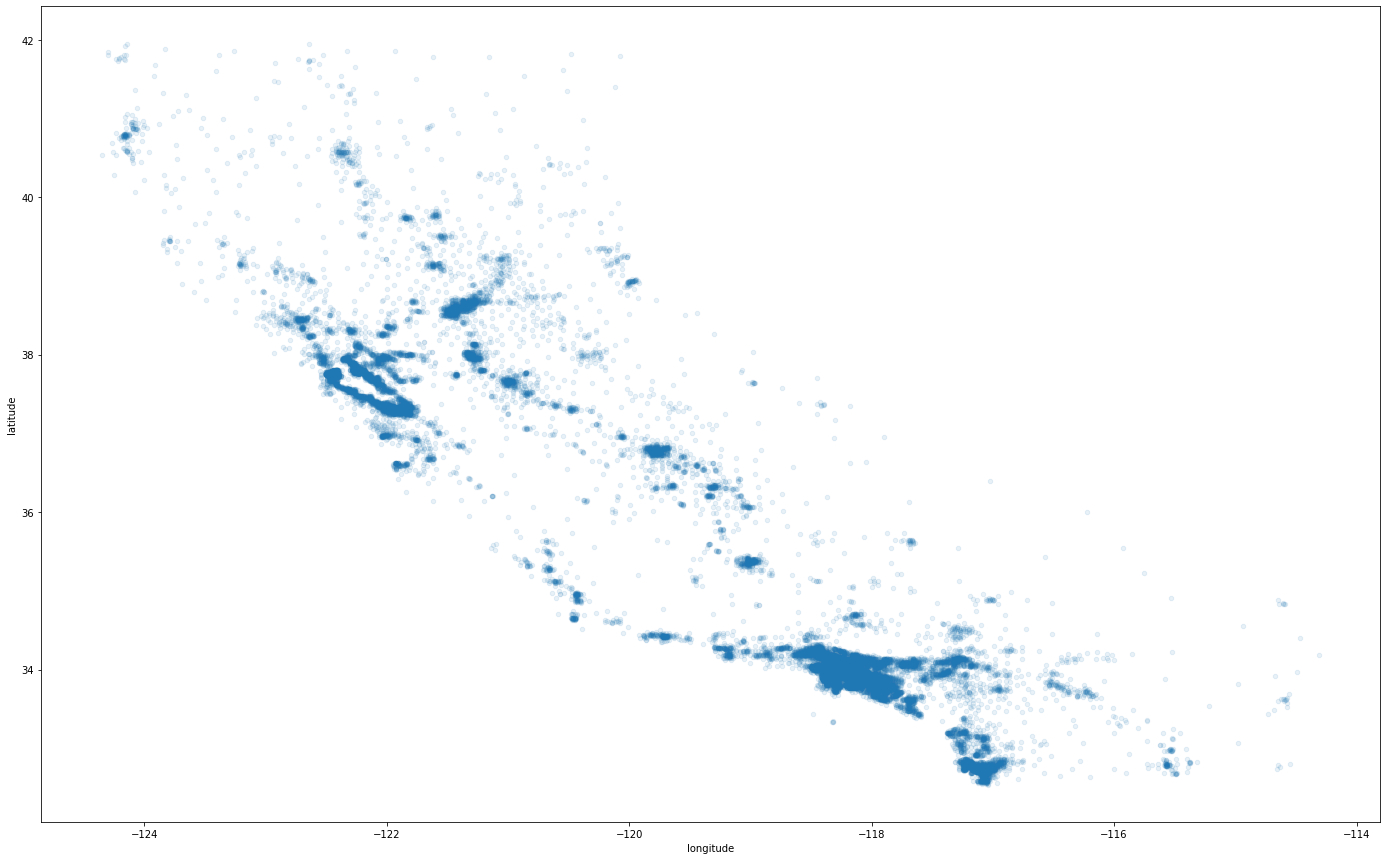

In [110]:
housing.plot(kind="scatter",y="latitude",x="longitude",figsize=(24,15),alpha=0.1)

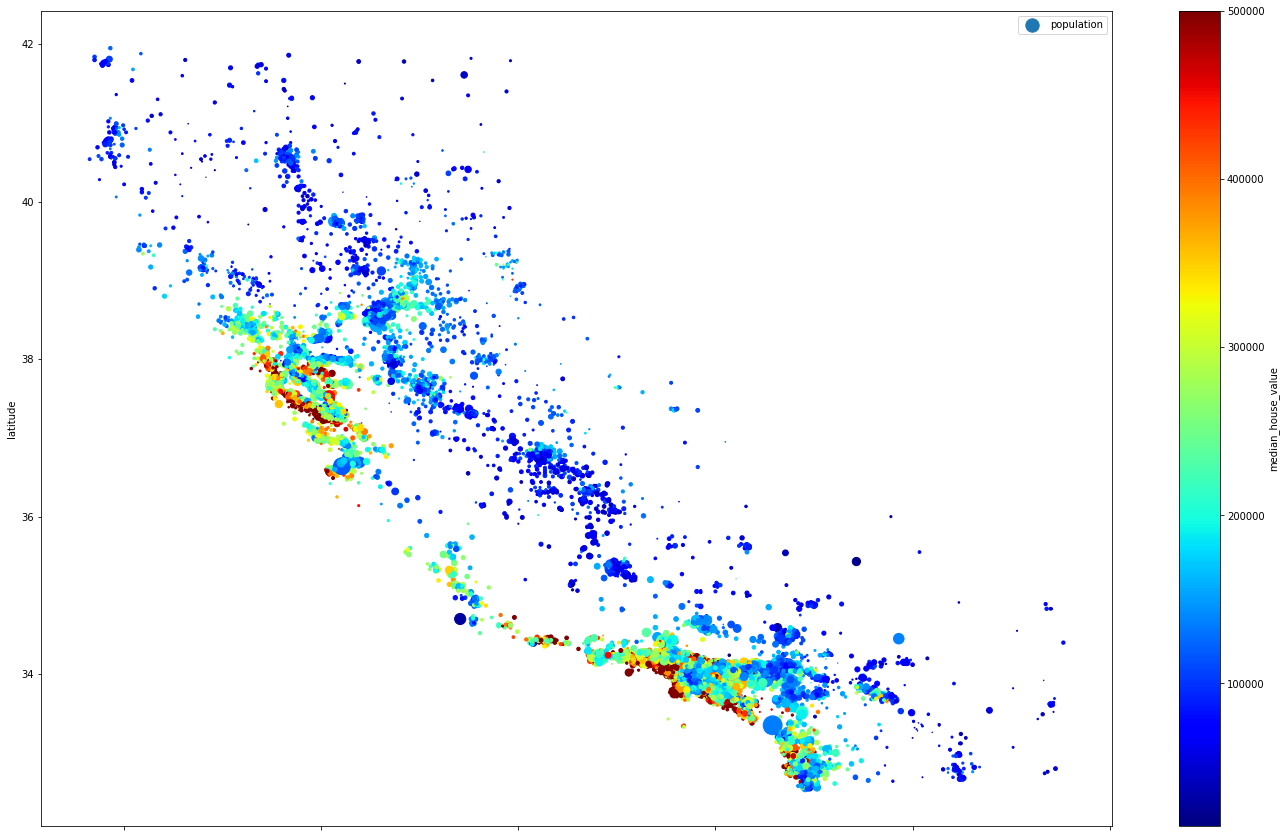

In [26]:
housing.plot(kind="scatter",x="longitude",y="latitude",s=housing["population"]/100,label="population",figsize=(24,15)
             ,c="median_house_value",cmap=plt.get_cmap("jet"),colorbar="True")
plt.legend()

In [27]:
import matplotlib.image as mimp

In [28]:
california=mimp.imread("/home/adesh/Downloads/california.jpg")

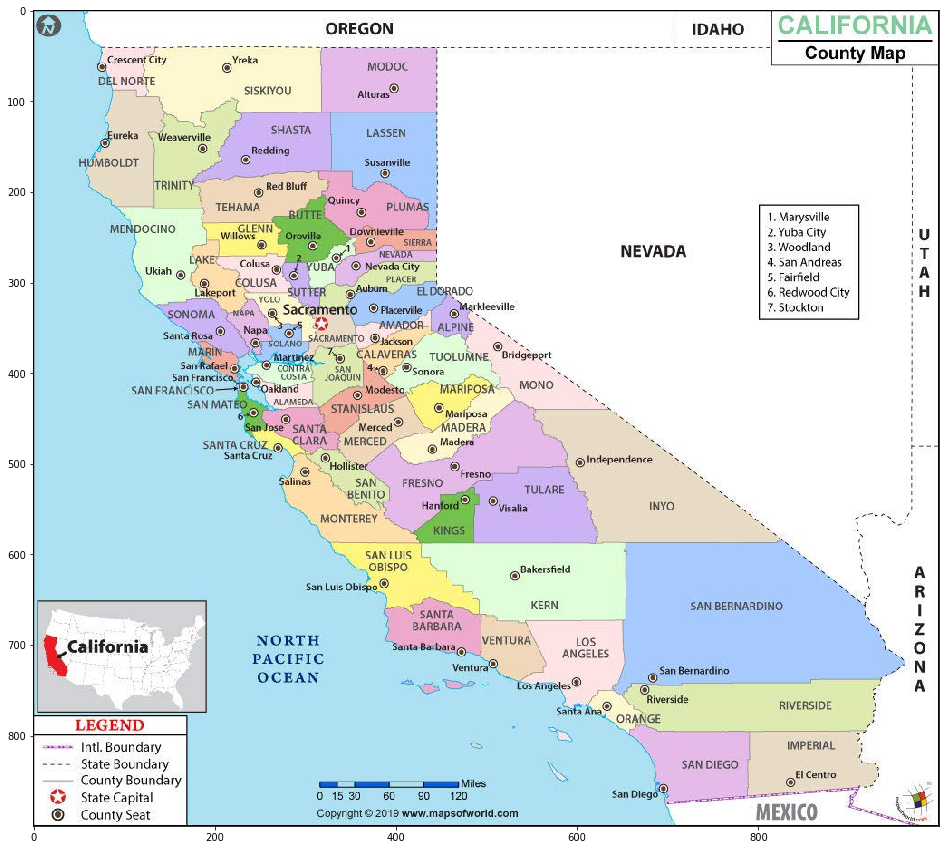

In [29]:
fig=plt.figure(figsize=(24,15))
plt.imshow(california)

In [111]:
housing_1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924931,-0.114698,0.048366,0.072622,0.101781,0.058301,-0.014785
latitude,-0.924931,1.000000,0.016691,-0.040375,-0.070442,-0.110816,-0.074354,-0.080208
housing_median_age,-0.114698,0.016691,1.000000,-0.361308,-0.323233,-0.295737,-0.305483,-0.112497
total_rooms,0.048366,-0.040375,-0.361308,1.000000,0.931904,0.854804,0.919479,0.197006
total_bedrooms,0.072622,-0.070442,-0.323233,0.931904,1.000000,0.876145,0.979789,-0.006632
population,0.101781,-0.110816,-0.295737,0.854804,0.876145,1.000000,0.905756,0.004069
households,0.058301,-0.074354,-0.305483,0.919479,0.979789,0.905756,1.000000,0.013214
median_income,-0.014785,-0.080208,-0.112497,0.197006,-0.006632,0.004069,0.013214,1.000000


In [31]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f667f44da90>,
      dtype=object)

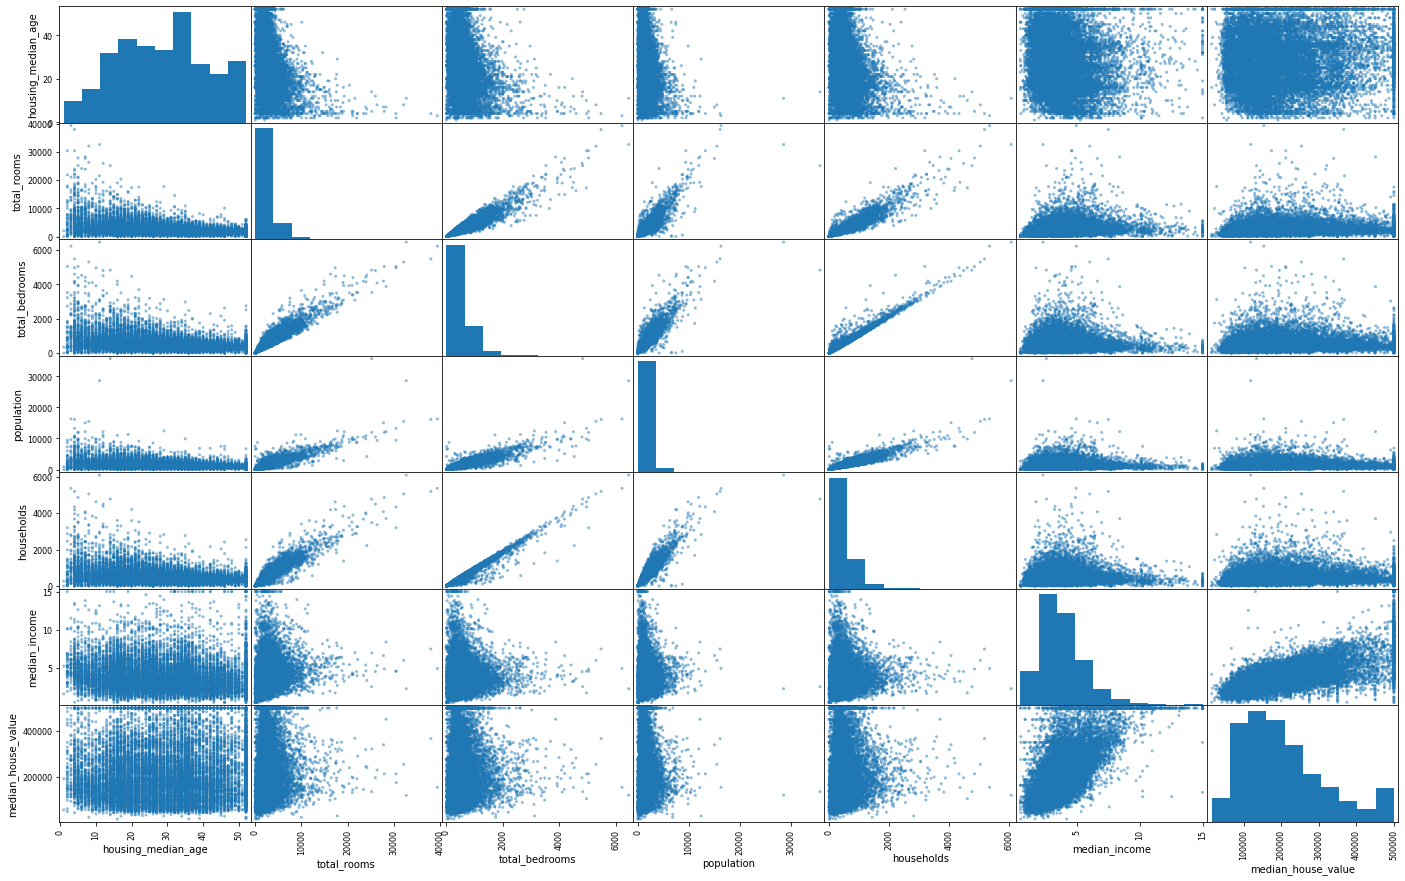

In [32]:
scatter_matrix(housing[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']],figsize=(24,15))

In [33]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

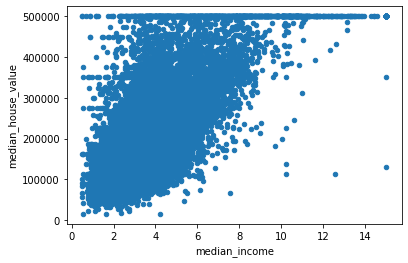

In [34]:
housing.plot(kind="scatter",x="median_income",y="median_house_value")# value of median_house_
#value is capped limited to 500000

In [35]:
house_value=housing.corr()
house_value["median_house_value"].sort_values(ascending=True)

latitude             -0.141793
longitude            -0.049105
population           -0.025245
total_bedrooms        0.047453
households            0.063682
housing_median_age    0.108614
total_rooms           0.133235
median_income         0.690234
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [36]:
median=housing["total_bedrooms"].median()

In [37]:
housing["total_bedrooms"].fillna(median,inplace=True)

In [38]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19599,-120.93,37.56,17.0,1812.0,361.0,672.0,334.0,1.5500,166100.0,INLAND
18019,-121.95,37.24,37.0,3109.0,541.0,1566.0,544.0,6.0235,413500.0,<1H OCEAN
10018,-121.20,39.23,9.0,2802.0,447.0,955.0,418.0,5.2359,213300.0,INLAND
19483,-120.98,37.66,40.0,3012.0,616.0,1423.0,595.0,2.6346,100600.0,INLAND
17652,-121.88,37.26,13.0,1676.0,471.0,710.0,406.0,3.8936,225900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN
11409,-117.94,33.71,18.0,3695.0,602.0,1779.0,572.0,5.9449,276500.0,<1H OCEAN
15234,-117.26,32.97,25.0,2582.0,495.0,1088.0,471.0,6.4651,500001.0,NEAR OCEAN
17105,-122.22,37.46,13.0,2888.0,546.0,1182.0,504.0,6.0255,409300.0,NEAR OCEAN


In [39]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.589632,35.652748,28.667938,2647.248547,539.020531,1431.460695,501.257267,3.871876,206967.476441
std,2.009511,2.140006,12.582963,2212.872106,425.657786,1157.972109,387.743806,1.903764,115509.733497
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.810000,33.940000,18.000000,1445.000000,296.000000,785.000000,279.000000,2.562175,119300.000000
50%,-118.520000,34.270000,29.000000,2129.000000,434.000000,1165.000000,409.000000,3.542150,180000.000000
75%,-118.010000,37.720000,37.000000,3153.250000,646.000000,1730.000000,607.250000,4.744375,264900.000000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [40]:
from sklearn.preprocessing import Imputer

In [41]:
imp=Imputer(strategy="median")

/home/adesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [112]:
housing_num=housing_1.drop("ocean_proximity",axis=1)

In [44]:
from sklearn.preprocessing import LabelBinarizer

In [113]:
lb=LabelBinarizer()
housing_cat=housing_1["ocean_proximity"]
housing_one_hot=lb.fit_transform(housing_cat)

In [46]:
housing_1=np.c_[housing_num,housing_one_hot]

In [47]:
from sklearn.base import BaseEstimator,TransformerMixin

In [48]:
room_col=3
bed_col=4
hh_col=6
population_col=5

In [49]:
class CombinedAttributes(BaseEstimator,TransformerMixin):
    def __init__(self,add_bed_per_hh=True):
        self.add_bed_per_hh=add_bed_per_hh
    def fit(self,X,y=None):
        return X
    def transform(self,X,y=None):
        rooms_per_hh=X[:,room_col]/X[:,hh_col]
        pop_per_hh=X[:,population_col]/X[:,hh_col]
        if self.add_bed_per_hh:
            bed_per_rooms=X[:,bed_col]/X[:,room_col]
            return np.c_[X,bed_per_rooms,rooms_per_hh,pop_per_hh]
        else:
            return np.c_[X,rooms_per_hh,pop_per_hh] 

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler    

In [51]:
num_pipe=Pipeline([("imputer",Imputer()),("ss",StandardScaler())])

/home/adesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [52]:
class DataframeSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attributes):
        self.attributes=attributes
    def fit(self,X,y=None):
        self
    def transform(self,X,y=None):
        return X[self.attributes].values

In [116]:
housing_num=imp.fit_transform(housing_num)

In [115]:
num_attributes=list(housing_num)
cat_attributes=["ocean_proximity"]

In [62]:
num_pipeline=Pipeline(([("imputer",Imputer())#can be used with the help of fit_transform(housing[num_attribute])
                       ,("ss",StandardScaler())])
cat_pipeline=Pipeline([("labelBinarizer",LabelBinarizer())])#can be used with the help of fit_transform(housing[cat_attribute])

/home/adesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [63]:
 from sklearn.pipeline import FeatureUnion

In [64]:
full_pipepline=FeatureUnion(transformer_list=[("num_pipeline",num_pipeline),("cat_pipeline",cat_pipeline)])

In [118]:
ss=StandardScaler()
housing_num=ss.fit_transform(housing_num)

In [119]:
housing_prepared=np.c_[housing_num,housing_one_hot]

In [120]:
housing_prepared.shape

(16512, 13)

In [124]:
test_set_num=test_set.drop("ocean_proximity",axis=1)
test_set_cat=test_set["ocean_proximity"]

In [125]:
test_num=imp.fit_transform(test_set_num)
test_num=ss.fit_transform(test_num)

In [126]:
test_cat=lb.fit_transform(test_set_cat)

In [127]:
test_prepared=np.c_[test_num,test_cat]

In [122]:
test_set_labels=test_set["median_house_value"]
test_set.drop("median_house_value",axis=1,inplace=True)

In [129]:
test_prepared.shape 

(4128, 13)

In [132]:
housing_label.shape

(16512,)

In [133]:
housing_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19599,-120.93,37.56,17.0,1812.0,361.0,672.0,334.0,1.5500,INLAND
18019,-121.95,37.24,37.0,3109.0,541.0,1566.0,544.0,6.0235,<1H OCEAN
10018,-121.20,39.23,9.0,2802.0,447.0,955.0,418.0,5.2359,INLAND
19483,-120.98,37.66,40.0,3012.0,616.0,1423.0,595.0,2.6346,INLAND
17652,-121.88,37.26,13.0,1676.0,471.0,710.0,406.0,3.8936,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,NEAR OCEAN
11409,-117.94,33.71,18.0,3695.0,602.0,1779.0,572.0,5.9449,<1H OCEAN
15234,-117.26,32.97,25.0,2582.0,495.0,1088.0,471.0,6.4651,NEAR OCEAN
17105,-122.22,37.46,13.0,2888.0,546.0,1182.0,504.0,6.0255,NEAR OCEAN


In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
lr_model_1=LinearRegression()
lr_model_1.fit(housing_prepared,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
some_data=housing_prepared[:5]
some_labels=housing_label[:5]
lr_model_1_pre=lr_model_1.predict(some_data)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(lr_model_1_pre,some_labels)
rmse=np.sqrt(mse)

In [141]:
rmse

62690.53300288917

In [143]:
lr_model_1_pre

array([ 72392.901622  , 329926.11234239, 168705.89784113, 140451.51503524,
       243453.41728385])

In [148]:
some_labels

19599    166100.0
18019    413500.0
10018    213300.0
19483    100600.0
17652    225900.0
Name: median_house_value, dtype: float64

In [149]:
from sklearn.tree import DecisionTreeRegressor

In [150]:
dtr_model_2=DecisionTreeRegressor()
dtr_model_2.fit(housing_prepared,housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [152]:
dtr_model_pre=dtr_model_2.predict(some_data)
mse=mean_squared_error(dtr_model_pre,some_labels)
rmse=np.sqrt(mse)

In [154]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtr_model_2,housing_prepared,housing_label,cv=10,scoring="neg_mean_squared_error")

In [156]:
rmse_score=np.sqrt(-score)

In [157]:
rmse_score

array([71886.70543017, 67701.68354724, 66213.00694052, 66254.49752337,
       70111.52510851, 67084.94744086, 67855.74611693, 66643.82944024,
       72355.59966462, 66111.9333341 ])

In [159]:
np.mean(rmse_score),np.std(rmse_score)

(68221.9474546565, 2250.2199800081103)